### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [14]:
import pandas as pd
dados = pd.read_csv('diabetes.csv')
print(dados.head())
x = dados.drop("diabetes", axis=1)
y = dados['diabetes']

   glicemia  pressao_sanguinea  dobra_cutane_triceps  insulina    imc  \
0        66                 23                    94      28.1  0.167   
1        40                 35                   168      43.1  2.288   
2        50                 32                    88      31.0  0.248   
3        70                 45                   543      30.5  0.158   
4        60                 23                   846      30.1  0.398   

   diabetes  
0         0  
1         1  
2         1  
3         1  
4         1  


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [15]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.05, random_state=5)
x_treino, x_validacao, y_treino, y_validacao = train_test_split(x, y, test_size=0.25, random_state=5)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

modelo_random_forest = RandomForestClassifier(max_depth=7, random_state=5)
modelo_random_forest.fit(x_treino, y_treino)
print("Acurácia de treino: ", modelo_random_forest.score(x_treino, y_treino))
print("Acurácia de validação: ", modelo_random_forest.score(x_validacao, y_validacao))
print("Acurácia de teste: ", modelo_random_forest.score(x_teste, y_teste))

modelo_decision_tree = DecisionTreeClassifier(max_depth=10, random_state=5)
modelo_decision_tree.fit(x_treino, y_treino)
print("Acurácia de treino: ", modelo_decision_tree.score(x_treino, y_treino))
print("Acurácia de validação: ", modelo_decision_tree.score(x_validacao, y_validacao))
print("Acurácia de teste: ", modelo_decision_tree.score(x_teste, y_teste))



Acurácia de treino:  0.9607142857142857
Acurácia de validação:  0.6702127659574468
Acurácia de teste:  0.85
Acurácia de treino:  0.9571428571428572
Acurácia de validação:  0.6702127659574468
Acurácia de teste:  0.65


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

Quantidade de diabéticos no conjunto de teste:  28
Quantidade de diabéticos no conjunto de teste:  28


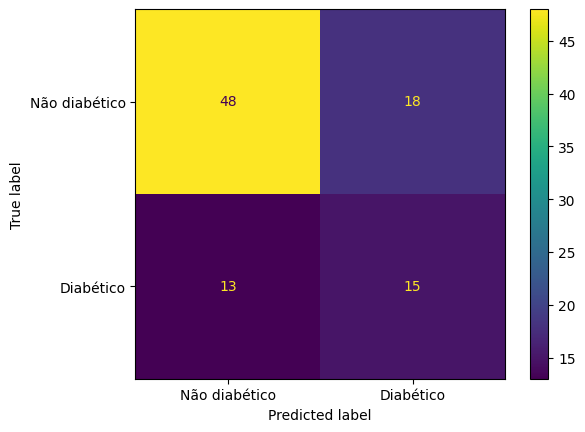

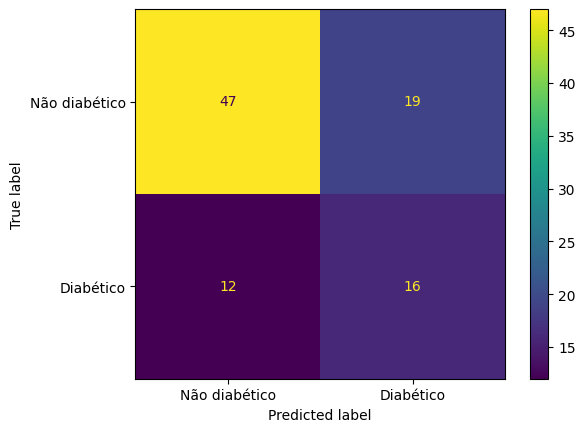

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

previsoes_random_forest = modelo_random_forest.predict(x_validacao)
cm = confusion_matrix(y_validacao, previsoes_random_forest)

count_diabetic = y_validacao.value_counts()[1]

print("Quantidade de diabéticos no conjunto de teste: ", count_diabetic)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não diabético', 'Diabético'])
disp.plot();


previsoes_decision_tree = modelo_decision_tree.predict(x_validacao)
cm = confusion_matrix(y_validacao, previsoes_decision_tree)

count_diabetic = y_validacao.value_counts()[1]

print("Quantidade de diabéticos no conjunto de teste: ", count_diabetic)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não diabético', 'Diabético'])
disp.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('Modelo de Random Forest:\n')
print("Acurácia: ", accuracy_score(y_validacao, previsoes_random_forest))
print("Precisão: ", precision_score(y_validacao, previsoes_random_forest))
print("Recall: ", recall_score(y_validacao, previsoes_random_forest))
print("F1: ", f1_score(y_validacao, previsoes_random_forest))

print('\nModelo de Decision Tree:\n')
print("Acurácia: ", accuracy_score(y_validacao, previsoes_decision_tree))
print("Precisão: ", precision_score(y_validacao, previsoes_decision_tree))
print("Recall: ", recall_score(y_validacao, previsoes_decision_tree))
print("F1: ", f1_score(y_validacao, previsoes_decision_tree))

Modelo de Random Forest:

Acurácia:  0.6702127659574468
Precisão:  0.45454545454545453
Recall:  0.5357142857142857
F1:  0.4918032786885246

Modelo de Decision Tree:

Acurácia:  0.6702127659574468
Precisão:  0.45714285714285713
Recall:  0.5714285714285714
F1:  0.5079365079365079


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

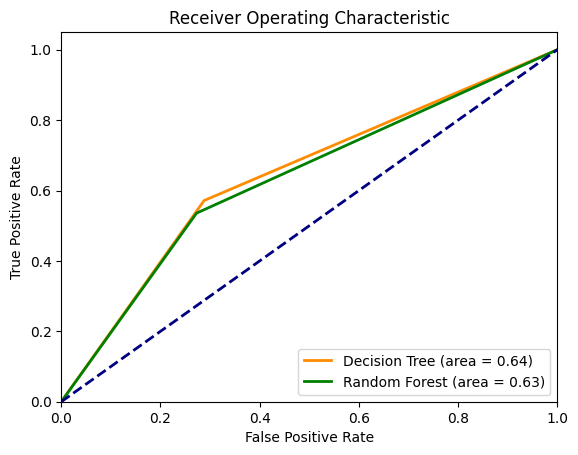

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Suponho que você já tenha y_validacao, previsoes_decision_tree e previsoes_random_forest definidos.

# Calcular as métricas para a Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_validacao, previsoes_decision_tree)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calcular as métricas para a Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_validacao, previsoes_random_forest)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Configurar o gráfico
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (area = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

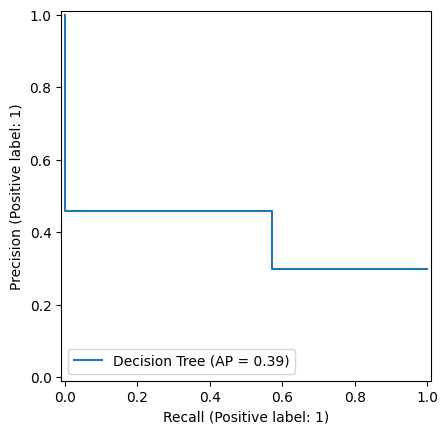

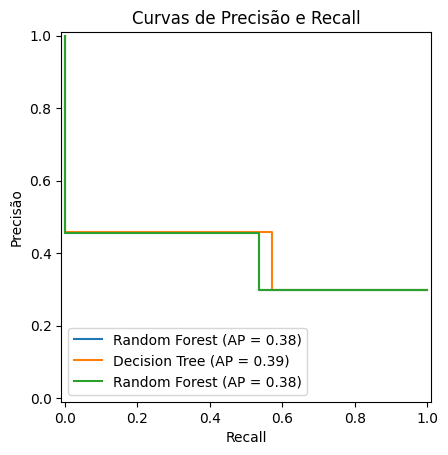

In [20]:
from sklearn.metrics import PrecisionRecallDisplay

decision_tree_precisionrecall = PrecisionRecallDisplay.from_predictions(y_validacao, previsoes_decision_tree, name='Decision Tree')

random_forest_precisionrecall = PrecisionRecallDisplay.from_predictions(y_validacao, previsoes_random_forest, name='Random Forest')

import matplotlib.pyplot as plt

# Plotando a curva de precisão da Decision Tree
decision_tree_precisionrecall.plot(ax=plt.gca())

# Plotando a curva de precisão da Random Forest
random_forest_precisionrecall.plot(ax=plt.gca())

# Configurando o título e os rótulos dos eixos
plt.title('Curvas de Precisão e Recall')
plt.xlabel('Recall')
plt.ylabel('Precisão')

# Exibindo o gráfico
plt.show()

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_validacao, previsoes_decision_tree))
print(classification_report(y_validacao, previsoes_random_forest))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        66
           1       0.46      0.57      0.51        28

    accuracy                           0.67        94
   macro avg       0.63      0.64      0.63        94
weighted avg       0.70      0.67      0.68        94

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        66
           1       0.45      0.54      0.49        28

    accuracy                           0.67        94
   macro avg       0.62      0.63      0.62        94
weighted avg       0.69      0.67      0.68        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [22]:
def intervalo_confianca(resultados, modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [23]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier

modelo_decision_tree = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=10, shuffle=True, random_state=5)
resultados = cross_val_score(modelo_decision_tree, x, y, cv=kf)

intervalo_confianca(resultados, 'Decision Tree')

modelo_random_forest = RandomForestClassifier(max_depth=10)
kf = KFold(n_splits=10, shuffle=True, random_state=5)
resultados = cross_val_score(modelo_random_forest, x, y, cv=kf)

intervalo_confianca(resultados, 'Random Forest')



Intervalo de confiança (Decision Tree): [0.4503522913874514, 0.7422508380577832]
Intervalo de confiança (Random Forest): [0.5159463974386413, 0.8099426495030371]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [24]:
from sklearn.model_selection import StratifiedKFold

modelo_decision_tree = DecisionTreeClassifier(max_depth=3)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados = cross_val_score(modelo_decision_tree, x, y, cv=kf, scoring='f1')

intervalo_confianca(resultados, 'Decision Tree')

modelo_random_forest = RandomForestClassifier(max_depth=3)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados = cross_val_score(modelo_random_forest, x, y, cv=kf, scoring='f1')

intervalo_confianca(resultados, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.30637521192762424, 0.6750481532486015]
Intervalo de confiança (Random Forest): [0.24167820548111266, 0.5495480175562559]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [25]:
"""
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

modelo_decision_tree = DecisionTreeClassifier(max_depth=3)
result_tree = cross_val_score(modelo_decision_tree, x, y, cv=loo)

modelo_random_forest = RandomForestClassifier(max_depth=2)
result_forest = cross_val_score(modelo_random_forest, x, y, cv=loo)

print(f'Acurácia média (Decision Tree): {result_tree.mean()}')
print(f'Acurácia média (Random Forest):{result_forest.mean()}')
"""


"\nfrom sklearn.model_selection import LeaveOneOut\n\nloo = LeaveOneOut()\n\nmodelo_decision_tree = DecisionTreeClassifier(max_depth=3)\nresult_tree = cross_val_score(modelo_decision_tree, x, y, cv=loo)\n\nmodelo_random_forest = RandomForestClassifier(max_depth=2)\nresult_forest = cross_val_score(modelo_random_forest, x, y, cv=loo)\n\nprint(f'Acurácia média (Decision Tree): {result_tree.mean()}')\nprint(f'Acurácia média (Random Forest):{result_forest.mean()}')\n"

# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [26]:
dados['diabetes'].value_counts(normalize=True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [35]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

def intervalo_confianca(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f'Intervalo de confiança: {media - 2 * desvio_padrao} - {min(media + 2 * desvio_padrao, 1)}')

modelo_decision_tree = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('SMOTE', SMOTE()), ('Decision Tree', modelo_decision_tree)])
sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados = cross_validate(pipeline, x, y, cv=sfk, scoring='f1')

intervalo_confianca(resultados)

Intervalo de confiança: 0.22465597104570742 - 0.6264154192605573


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [36]:
from imblearn.under_sampling import NearMiss

modelo_decision_tree = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('NearMiss', NearMiss(version=3)), ('Decision Tree', modelo_decision_tree)])
sfk = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultados = cross_validate(pipeline, x, y, cv=sfk, scoring='f1')

intervalo_confianca(resultados)

Intervalo de confiança: 0.28114011652130455 - 0.5723258851983123


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.55      0.86      0.67         7

    accuracy                           0.70        20
   macro avg       0.72      0.74      0.70        20
weighted avg       0.77      0.70      0.71        20



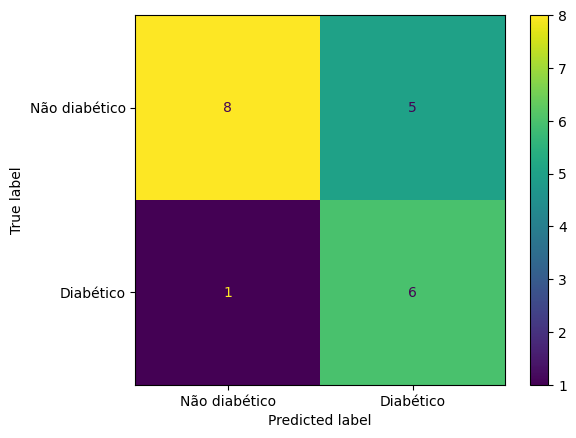

In [39]:
over_sampling = SMOTE()
under_sampling = NearMiss(version=3)

x_resampled, y_resampled = over_sampling.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_resampled, y_resampled)

y_predicted = modelo.predict(x_teste)

print(classification_report(y_teste, y_predicted))
ConfusionMatrixDisplay.from_predictions(y_teste, y_predicted, display_labels=['Não diabético', 'Diabético']);

In [41]:
dados['diabetes'].value_counts()

diabetes
0    264
1    130
Name: count, dtype: int64